In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import cmocean.cm as cmo

import xarray as xr
import xgcm
from xhistogram.xarray import histogram
import xroms

from bichan_utils import *

import hvplot.xarray
import geoviews as gv

import cartopy.crs as ccrs
import cartopy.feature as cfeature
proj = ccrs.LambertConformal(central_longitude=-92, central_latitude=29)
coast_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='k', facecolor='0.8')
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

bal = plt.cm.get_cmap(cmo.balance)
newcolors = bal(np.linspace(0, 1, 256))
vals = list(range(256))
newcmp = ListedColormap(newcolors[vals[:110] + vals[-110:]])
# tiles = gv.tile_sources.ESRI

import warnings
warnings.filterwarnings("ignore")

/var/folders/qh/qtc973c11kz8h3wlry5lmvkh0000gn/T/ipykernel_69524/688150656.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bal = plt.cm.get_cmap(cmo.balance)


In [2]:
from dask.distributed import Client

client = Client()
client

<Client: 'tcp://127.0.0.1:63688' processes=4 threads=8, memory=16.00 GiB>

In [3]:
ds = xr.open_zarr('./surface_child.zarr', 
                  consolidated=True)
ds, grid = xroms.roms_dataset(ds)
ds = add_derivatives(ds, grid)


# Figures

Some general definitions for the histogram analysis that will be used for all figures, so they are calculated on the same sub-domain over the same timeframe.

In [4]:
# time and space slices
tslice = {'ocean_time': slice('2010-6-15', '2010-6-20')}
ihslice = {'xi_rho': slice(50, 400),
          'eta_rho': slice(150, 350)}

# Horizontal area of cells
dA = 1.0/(ds.pm * ds.pn)

# Conditional to define only high, positive vorticity
conditional = (ds.zeta.isel(ihslice).sel(tslice) > 1.0) 
# conditional = True

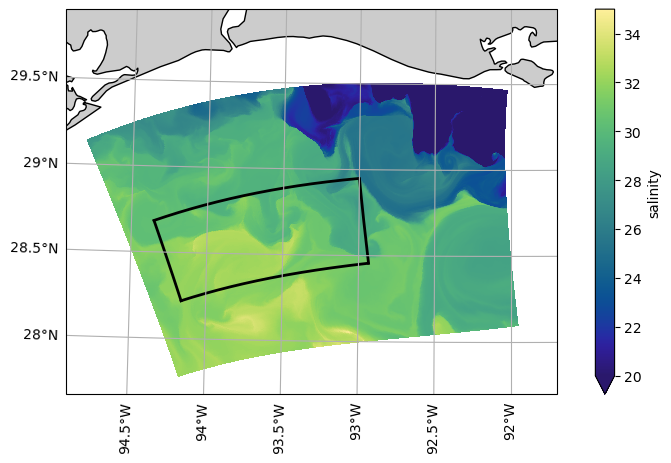

In [5]:
proj = ccrs.LambertConformal(central_longitude=-92, central_latitude=29)
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10, 5),
                            subplot_kw={'projection': proj})

ds.salt.sel(ocean_time='2010-6-20 00:00').plot(x='lon_rho', y='lat_rho',
                                                              transform=ccrs.PlateCarree(),
                                                              vmin=20, vmax=35, cmap=cmo.haline, ax=ax)

add_box(ds, ax, ihslice, draw_labels=True)

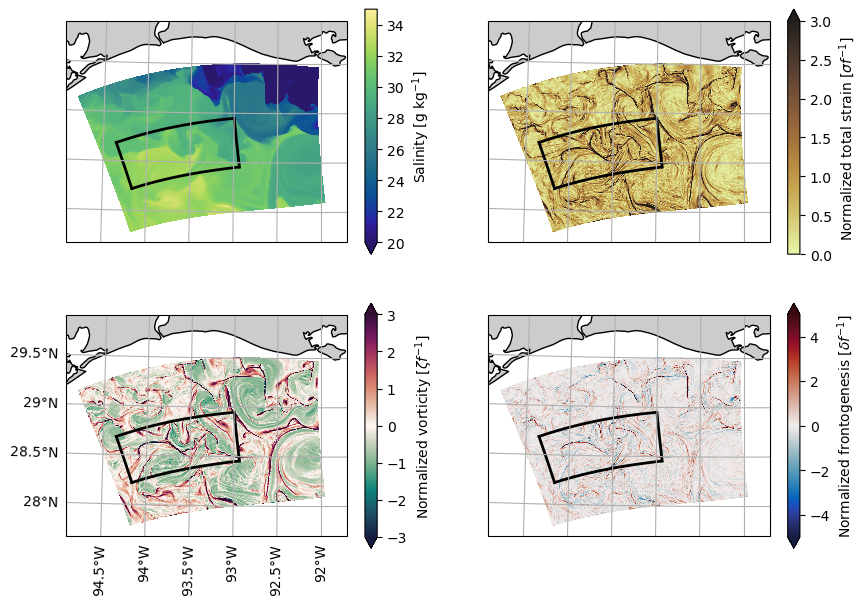

In [6]:
proj = ccrs.LambertConformal(central_longitude=-92, central_latitude=29)
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 7),
                            subplot_kw={'projection': proj})

# fig.tight_layout()

timestr = '2010-6-20 00:00'

ax = axs[0,0]
ds.salt.sel(ocean_time=timestr).plot(x='lon_rho', y='lat_rho',
                                     transform=ccrs.PlateCarree(),
                                     vmin=20, vmax=35, cmap=cmo.haline, ax=ax,
                                     cbar_kwargs={'label':r'Salinity [g kg$^{-1}$]'})
add_box(ds, ax, ihslice, draw_labels=False)


ax = axs[1,0]
ds.zeta.sel(ocean_time=timestr).plot(x='lon_rho', y='lat_rho',
                                     transform=ccrs.PlateCarree(),
                                     vmin=-3, vmax=3, cmap=cmo.curl, ax=ax,
                                     cbar_kwargs={'label':r'Normalized vorticity [$\zeta f^{-1}$]'})
add_box(ds, ax, ihslice, draw_labels=True)


ax = axs[0,1]
ds.sigma.sel(ocean_time=timestr).plot(x='lon_rho', y='lat_rho',
                                     transform=ccrs.PlateCarree(),
                                     vmin=0, vmax=3, cmap=cmo.turbid, ax=ax,
                                     cbar_kwargs={'label':r'Normalized total strain [$\sigma f^{-1}$]'})
add_box(ds, ax, ihslice, draw_labels=False)


ax = axs[1,1]
ds.nFGF.sel(ocean_time=timestr).plot(x='lon_rho', y='lat_rho',
                                     transform=ccrs.PlateCarree(),
                                     vmin=-5, vmax=5, cmap=cmo.balance, ax=ax,
                                     cbar_kwargs={'label':r'Normalized frontogenesis [$\delta f^{-1}$]'})
add_box(ds, ax, ihslice, draw_labels=False)

plt.savefig('surface_snapshot_v2.png', dpi=300)

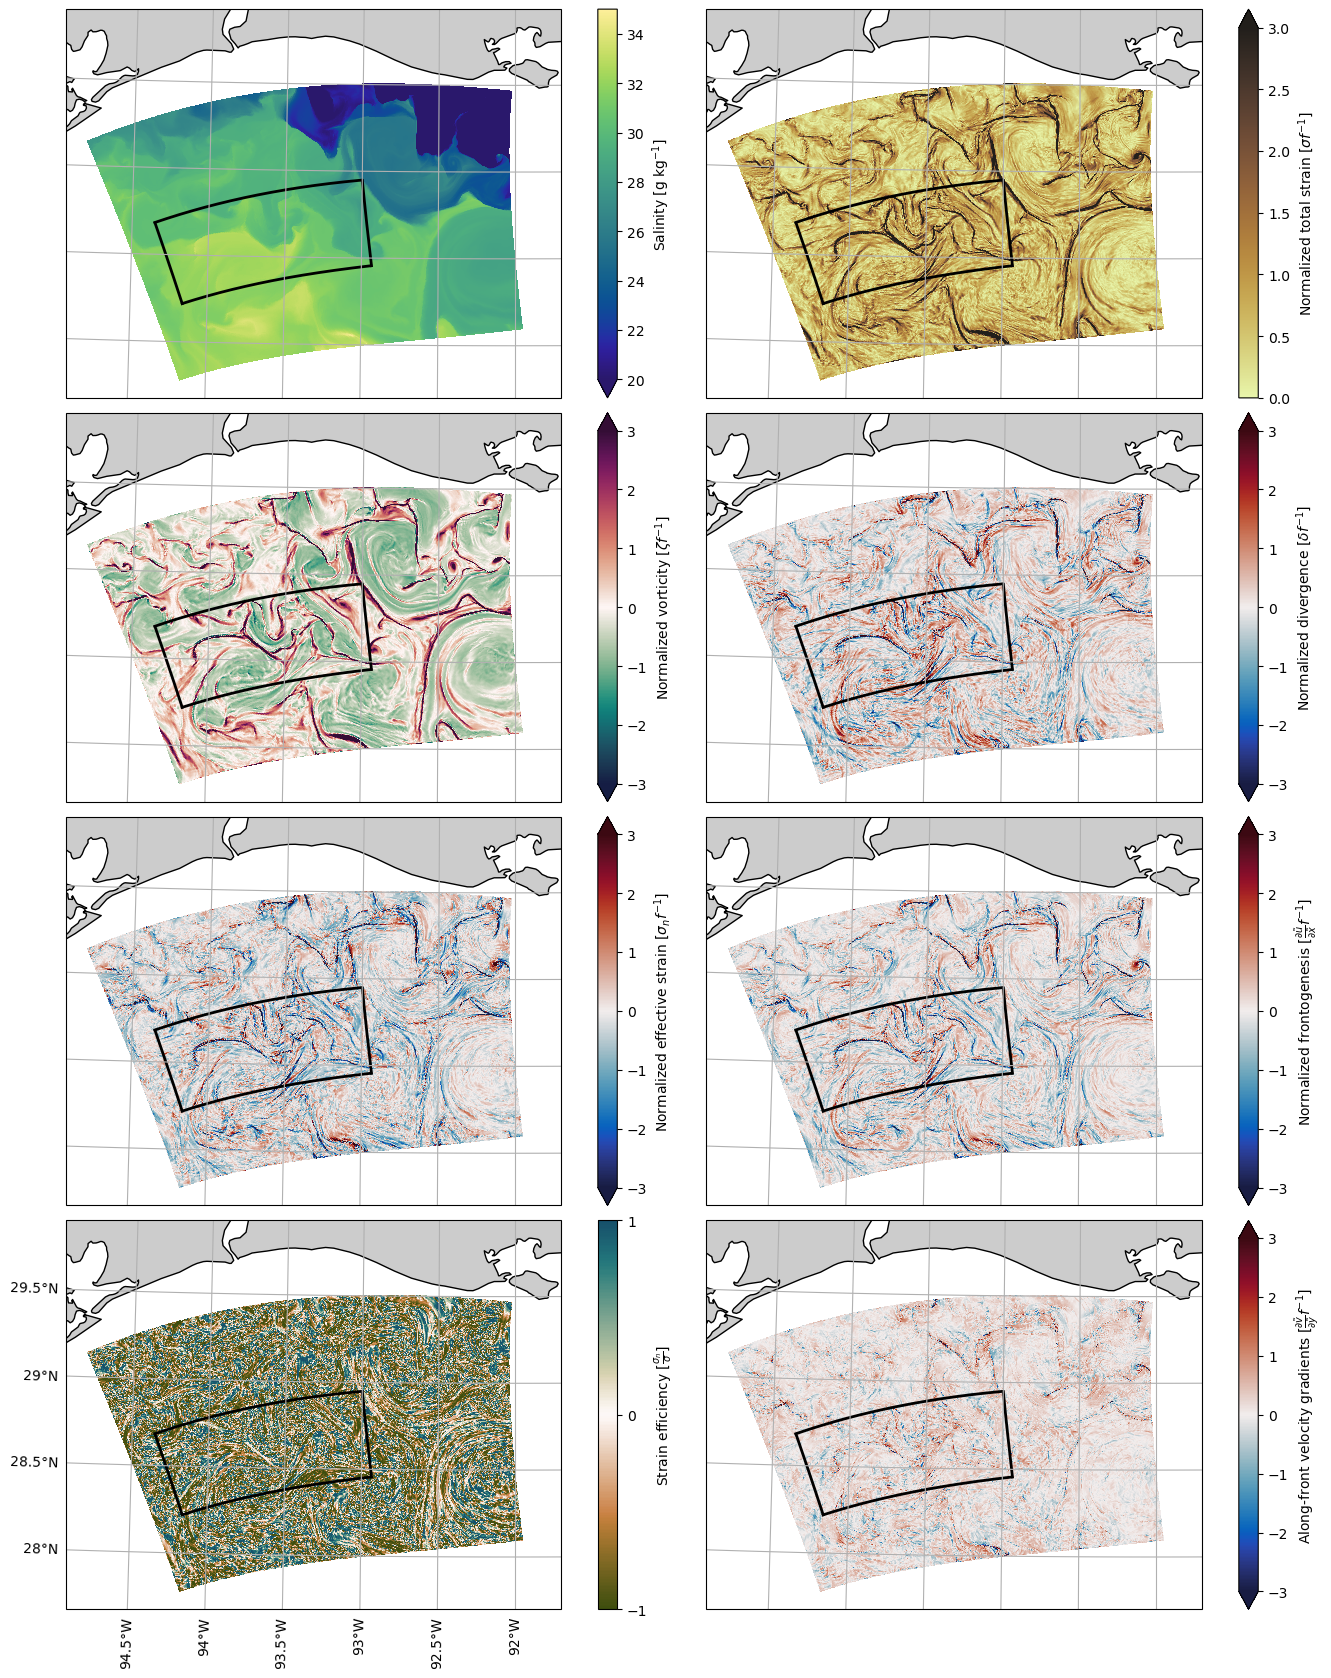

In [7]:
import numpy as np
from matplotlib.colors import ListedColormap
proj = ccrs.LambertConformal(central_longitude=-92, central_latitude=29)
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(14, 16.3),
                            subplot_kw={'projection': proj})

fig.tight_layout()

timestr = '2010-6-20 00:00'

ax = axs[0,0]
ds.salt.sel(ocean_time=timestr).plot(x='lon_rho', y='lat_rho',
                                     transform=ccrs.PlateCarree(),
                                     vmin=20, vmax=35, cmap=cmo.haline, ax=ax,
                                     cbar_kwargs={'label':r'Salinity [g kg$^{-1}$]'})
add_box(ds, ax, ihslice, draw_labels=False)


ax = axs[1,0]
ds.zeta.sel(ocean_time=timestr).plot(x='lon_rho', y='lat_rho',
                                     transform=ccrs.PlateCarree(),
                                     vmin=-3, vmax=3, cmap=cmo.curl, ax=ax,
                                     cbar_kwargs={'label':r'Normalized vorticity [$\zeta f^{-1}$]'})
add_box(ds, ax, ihslice, draw_labels=False)



ax = axs[0,1]
ds.sigma.sel(ocean_time=timestr).plot(x='lon_rho', y='lat_rho',
                                     transform=ccrs.PlateCarree(),
                                     vmin=0, vmax=3, cmap=cmo.turbid, ax=ax,
                                     cbar_kwargs={'label':r'Normalized total strain [$\sigma f^{-1}$]'})
add_box(ds, ax, ihslice, draw_labels=False)

ax = axs[1,1]
ds.delta.sel(ocean_time=timestr).plot(x='lon_rho', y='lat_rho',
                                     transform=ccrs.PlateCarree(),
                                     vmin=-3, vmax=3, cmap=cmo.balance, ax=ax,
                                     cbar_kwargs={'label':r'Normalized divergence [$\delta f^{-1}$]'})
add_box(ds, ax, ihslice, draw_labels=False)


ax = axs[2,1]
ds.du_cf.sel(ocean_time=timestr).plot(x='lon_rho', y='lat_rho',
                                     transform=ccrs.PlateCarree(),
                                     vmin=-3, vmax=3, cmap=cmo.balance, ax=ax,
                                     cbar_kwargs={'label':r'Normalized frontogenesis [$\frac{\partial \tilde{u}}{\partial \tilde{x}} f^{-1}$]'})
add_box(ds, ax, ihslice, draw_labels=False)


ax = axs[2,0]
ds.tilde_sigma_n.sel(ocean_time=timestr).plot(x='lon_rho', y='lat_rho',
                                     transform=ccrs.PlateCarree(),
                                     vmin=-3, vmax=3, cmap=cmo.balance, ax=ax,
                                     cbar_kwargs={'label':r'Normalized effective strain [$\sigma_n f^{-1}$]'})
add_box(ds, ax, ihslice, draw_labels=False)


ax = axs[3,1]
ds.du_af.sel(ocean_time=timestr).plot(x='lon_rho', y='lat_rho',
                                     transform=ccrs.PlateCarree(),
                                     vmin=-3, vmax=3, cmap=cmo.balance, ax=ax,
                                     cbar_kwargs={'label':r'Along-front velocity gradients [$\frac{\partial \tilde{v}}{\partial \tilde{y}} f^{-1}$]'})
add_box(ds, ax, ihslice, draw_labels=False)

new_cmap = cmo.tarn(np.linspace(0.1, 0.9, 256))
new_cmap = ListedColormap(new_cmap)

ax = axs[3,0]
ds.strain_efficiency.sel(ocean_time=timestr).plot(x='lon_rho', y='lat_rho',
                                     transform=ccrs.PlateCarree(),
                                     vmin=-1.0, vmax=1.0, cmap=new_cmap, ax=ax,
                                     cbar_kwargs={'label':r'Strain efficiency [$\frac{\sigma_n}{\sigma}$]', 'ticks':[-1, 0, 1]})
add_box(ds, ax, ihslice, draw_labels=True)

plt.savefig('surface_snapshot_v3.png', dpi=300, bbox_inches='tight')

In [8]:
cbins = np.linspace(-5, 3, 201)
abins = np.linspace(-3, 3, 201)
h = histogram(ds.du_cf.sel(tslice).isel(ihslice).where(conditional),
              ds.du_af.sel(tslice).isel(ihslice).where(conditional), 
              bins=[cbins, abins]).compute()

In [9]:
# create 2xtimexspace matrix
X = np.asarray([ds.du_cf.sel(tslice).isel(ihslice).where(conditional).values,
                ds.du_af.sel(tslice).isel(ihslice).where(conditional).values])

# remove nans and flatten time and spacial dims
idx = ~np.isnan(X[0])
X = X[:, idx]

e, v = np.linalg.eig(np.cov(X-X.mean(axis=1, keepdims=True)))

# The distribution mean in x & y
yo, xo = X.mean(axis=1)

# The major/minor axis of variation, as a vector centered at 0,0
v_major = [np.sqrt(e[0])*v[1, 0], np.sqrt(e[0])*v[0, 0]]
v_minor = [np.sqrt(e[1])*v[1, 1], np.sqrt(e[1])*v[0, 1]]

# The angle of the major axis, relative to the positive y-axis, positive CCW
# In this case, pi/4 represents straining flow, 0 represents divergent flow
theta = np.arctan(v[1, 0]/v[0, 0])

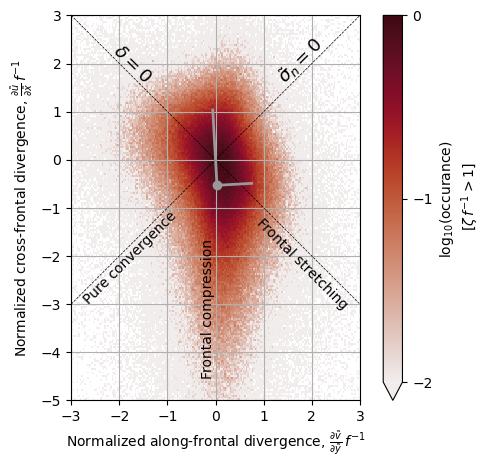

In [10]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
pca = np.log10(h/h.max()).plot(ax=ax, cmap=cmo.amp, 
                           vmin=-2, vmax=0,
                           cbar_kwargs={'label':'log$_{10}$(occurance) \n [$\\zeta\,f^{-1} > 1$]',
                                        'ticks': [-2, -1, 0]})
ax.set_xlabel(r'Normalized along-frontal divergence, $\frac{\partial\tilde{v}}{\partial\tilde{y}}\,f^{-1}$')
ax.set_ylabel(r'Normalized cross-frontal divergence, $\frac{\partial\tilde{u}}{\partial\tilde{x}}\,f^{-1}$')

ax.plot([-3, 3], [-3, 3], '--k', lw=0.5)
ax.plot([-3, 3], [3, -3], '--k', lw=0.5)

ax.plot(xo, yo, 'o', color='0.6')
ax.plot([xo, xo+np.sqrt(e[0])*v[1, 0]], [yo, yo+np.sqrt(e[0])*v[0, 0]], '-', color='0.6', lw=2)
ax.plot([xo, xo+np.sqrt(e[1])*v[1, 1]], [yo, yo+np.sqrt(e[1])*v[0, 1]], '-', color='0.6', lw=2)

ax.text(-2.2, 1.6, r'$\delta=0$', rotation=-45, fontsize=13)
ax.text(1.2, 1.6, r'$\tilde{\sigma}_n=0$', rotation=45, fontsize=13)

ax.text(-2.8, -3, r'Pure convergence', rotation=45)
ax.text(-.3, -4.5, r'Frontal compression', rotation=90)
ax.text(.8, -3.1, r'Frontal stretching', rotation=-45)

ax.set_aspect(1.0)
ax.grid(True)

plt.savefig('frontal_coords.png', dpi=300)


## Property Histograms

In [11]:
zeta_bins = np.linspace(-3, 3, 201)
sigma_bins = np.linspace(0, 3, 201)
delta_bins = np.linspace(-3, 3, 201)

h_zeta = histogram(ds.zeta.isel(ihslice).sel(tslice), bins=[zeta_bins,], weights=dA.isel(ihslice)).compute()
h_zeta.name = ''
h_sigma = histogram(ds.sigma.isel(ihslice).sel(tslice), bins=[sigma_bins,], weights=dA.isel(ihslice)).compute()
h_sigma.name = ''
h_delta = histogram(ds.delta.isel(ihslice).sel(tslice), bins=[delta_bins,], weights=dA.isel(ihslice)).compute()
h_delta.name = ''

In [12]:
h_delta = histogram(ds.delta.isel(ihslice).sel(tslice).where(conditional), bins=[delta_bins,], weights=dA.isel(ihslice)).compute()
h_delta.name = ''

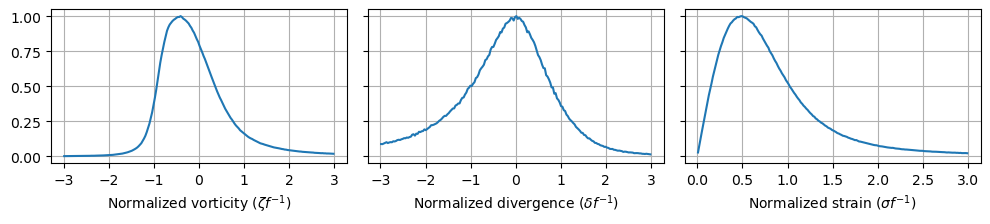

In [13]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(10, 2))

ax_zeta = axs[0]
ax_delta = axs[1]
ax_sigma = axs[2]

(h_zeta/h_zeta.max()).plot(ax=ax_zeta)
ax_zeta.grid(True)
ax_zeta.set_xlabel(r'Normalized vorticity ($\zeta f^{-1}$)')
ax_zeta.set_ylabel('')

(h_sigma/h_sigma.max()).plot(ax=ax_sigma)
ax_sigma.grid(True)
ax_sigma.set_xlabel(r'Normalized strain ($\sigma f^{-1}$)')
ax_sigma.set_ylabel('')

(h_delta/h_delta.max()).plot(ax=ax_delta)
ax_delta.grid(True)
ax_delta.set_xlabel(r'Normalized divergence ($\delta f^{-1}$)')
ax_delta.set_ylabel('')

plt.subplots_adjust(left=0.06, right=0.99, top=0.99, bottom=0.22, wspace=0.07)

fig.savefig('vort_div_strain_histograms.pdf')

## strain and vorticity

This is a copy of the Shcherbina plot

In [14]:
zeta_bins = np.linspace(-2, 3, 51)
sigma_bins = np.linspace(0, 3, 101)

h_vort_sigma = histogram(ds.sigma.isel(ihslice).sel(tslice),
                         ds.zeta.isel(ihslice).sel(tslice),
              bins=[sigma_bins, zeta_bins],
              weights=dA.isel(ihslice)
             ).compute()



hddd = histogram(ds.sigma.isel(ihslice).sel(tslice), 
                 ds.zeta.isel(ihslice).sel(tslice),
                   bins=[sigma_bins, zeta_bins],
                   weights=ds.nFGF.sel(tslice).isel(ihslice)* dA.isel(ihslice)).compute()

h_nfgf = (hddd/h_vort_sigma)
h_vort_sigma /= h_vort_sigma.max()
h_nfgf = h_nfgf.where(h_vort_sigma > 1e-2)


/Users/hetl729/miniconda3/envs/seahorce/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/hetl729/miniconda3/envs/seahorce/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/hetl729/miniconda3/envs/seahorce/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/hetl729/miniconda3/envs/seahorce/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
2024-04-25 16:49:38,924 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


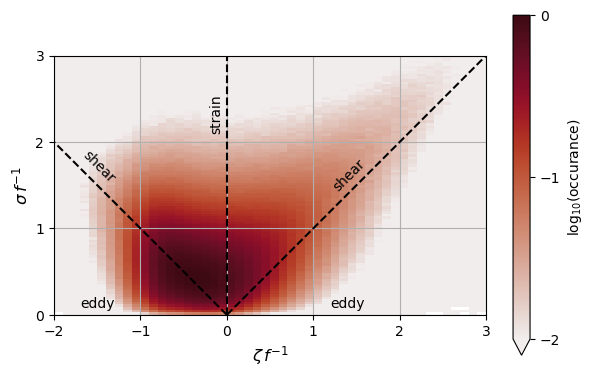

In [15]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0.1, 0.1, 0.9, 0.85])

np.log10(h_vort_sigma).plot(cmap=cmo.amp, vmin=-2, vmax=0, ax=ax, cbar_kwargs={'label':r'log$_{10}$(occurance)',
                                                                                                 'ticks': [-2, -1, 0]})
ax.grid(True)
ax.set_aspect(1.0)
ax.plot((0, 3), (0, 3), '--k')
ax.plot((0, -2), (0, 2), '--k')
ax.plot((0, 0), (0, 3), '--k')
ax.text(-1.7, 0.05, 'eddy', horizontalalignment='left', verticalalignment='bottom')
ax.text(1.2, 0.05, 'eddy', horizontalalignment='left', verticalalignment='bottom')
ax.text(1.2, 1.4, 'shear', horizontalalignment='left', verticalalignment='bottom', rotation=45)
ax.text(-1.7, 1.5, 'shear', horizontalalignment='left', verticalalignment='bottom', rotation=-45)
ax.text(-0.2, 2.1, 'strain', horizontalalignment='left', verticalalignment='bottom', rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_xlabel(r'$\zeta\,f^{-1}$', fontsize=12)
ax.set_ylabel(r'$\sigma\,f^{-1}$', fontsize=12);

fig.savefig('strain-vorticity.png', dpi=300)

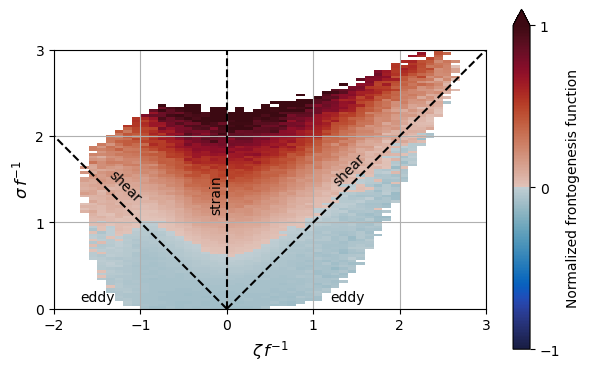

In [16]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0.1, 0.1, 0.9, 0.85])

h_nfgf.plot(cmap=newcmp, vmin=-1, vmax=1, ax=ax, cbar_kwargs={'label':r'Normalized frontogenesis function',
                                                                                                 'ticks': [-2, -1, 0, 1, 2]})
ax.grid(True)
ax.set_aspect(1.0)
ax.plot((0, 3), (0, 3), '--k')
ax.plot((0, -2), (0, 2), '--k')
ax.plot((0, 0), (0, 3), '--k')
ax.text(-1.7, 0.05, 'eddy', horizontalalignment='left', verticalalignment='bottom')
ax.text(1.2, 0.05, 'eddy', horizontalalignment='left', verticalalignment='bottom')
ax.text(1.2, 1.4, 'shear', horizontalalignment='left', verticalalignment='bottom', rotation=45)
ax.text(-1.4, 1.2, 'shear', horizontalalignment='left', verticalalignment='bottom', rotation=-45)
ax.text(-0.2, 1.1, 'strain', horizontalalignment='left', verticalalignment='bottom', rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_xlabel(r'$\zeta\,f^{-1}$', fontsize=12)
ax.set_ylabel(r'$\sigma\,f^{-1}$', fontsize=12);

fig.savefig('strain-vorticity-nfgf.png', dpi=300)


## Surface vorticity vs surface density gradients

In [17]:
zeta_bins = np.linspace(-4, 6, 101)
gradq_bins = np.linspace(-7, -2, 51)
gradq2_bins = np.linspace(-10, -4, 51)

h_vort_grad = histogram(np.log10(np.sqrt(ds.gradq2)).isel(ihslice).sel(tslice),
              ds.zeta.isel(ihslice).sel(tslice),
              bins=[gradq_bins, zeta_bins],
              weights=dA.isel(ihslice)
             ).compute()

h_vort_grad2 = histogram(np.log10(ds.gradq2).isel(ihslice).sel(tslice),
              ds.zeta.isel(ihslice).sel(tslice),
              bins=[gradq2_bins, zeta_bins],
              weights=dA.isel(ihslice)
             ).compute()

2024-04-25 16:49:44,611 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
/Users/hetl729/miniconda3/envs/seahorce/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
2024-04-25 16:49:46,612 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-04-25 16:49:47,032 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
/Users/hetl729/miniconda3/envs/seahorce/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
2024-04-25 16:49:48,772 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
/Users/hetl729/miniconda3/envs/seahorce/lib/python3.11/site-packages/dask/core.py:121: Run

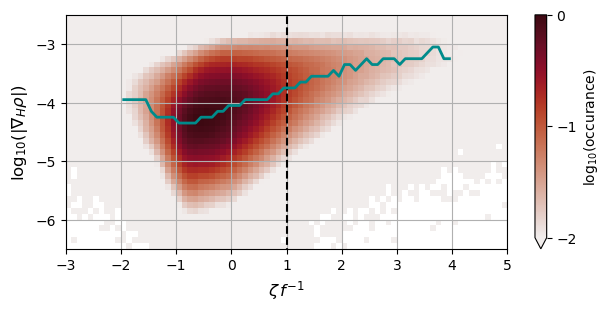

In [18]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_axes([0.1, 0.18, 0.92, 0.78])

np.log10(h_vort_grad/h_vort_grad.max()).plot(cmap=cmo.amp, 
                                             vmin=-2, vmax=0, ax=ax,
                                             cbar_kwargs={'label':'log$_{10}$(occurance)',
                                                          'ticks': [-2, -1, 0]})

ax.plot([1, 1], [-7, -2], '--k')
ax.set_xlabel(r'$\zeta\,f^{-1}$', fontsize=12)
ax.set_ylabel(r'log$_{10}( | \nabla_H\rho | )$', fontsize=12);

idx = h_vort_grad.values.argmax(axis=0)
zeta_centers = 0.5*(zeta_bins[1:] + zeta_bins[:-1])
grad_centers = 0.5*(gradq_bins[1:] + gradq_bins[:-1])
ax.plot(zeta_centers[20:80], grad_centers[idx][20:80], '-', color='darkcyan', lw=2)

ax.grid(True)
ax.set_yticks(np.arange(-6, 0));
ax.set_xlim(-3, 5)
ax.set_ylim(-6.5, -2.5);

fig.savefig('vort_vs_gradrho.png', dpi=300)

## Histograms in $\sigma$ and $\delta$

First normalized frontogenesis function, second, occurance

In [19]:
# Bins for histogram
sdelta_bins = np.linspace(-10, 10, 201)
ssigma_bins = np.linspace(0, 10, 101)

# The sum of the areas in the histogram bins, for normalization per unit area
hdA = histogram(ds.sigma.isel(ihslice).sel(tslice).where(conditional), 
                ds.delta.isel(ihslice).sel(tslice).where(conditional),
                   bins=[ssigma_bins, sdelta_bins],
                   weights=dA.isel(ihslice).where(conditional))

# The area-weighted, normalized, frontogenesis funtion histogram
hddd = histogram(ds.sigma.isel(ihslice).sel(tslice).where(conditional), 
                 ds.delta.isel(ihslice).sel(tslice).where(conditional),
                   bins=[ssigma_bins, sdelta_bins],
                   weights=ds.nFGF.sel(tslice).isel(ihslice).where(conditional)* dA.isel(ihslice).where(conditional))

h_frontogenesis = (hddd/hdA).compute()
h_frontogenesis.name = r'Normalized frontogenesis function ($\zeta/f > 1$)'

h_dA = (hdA/hdA.max()).compute()
h_dA.name = 'Normalized occurance'

2024-04-25 16:50:02,413 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2024-04-25 16:50:02,737 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2024-04-25 16:50:02,739 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-04-25 16:50:02,821 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2024-04-25 16:50:04,586 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2024-04-25 16:50:04,676 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2024-04-25 16:50:04,823 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-04-25 16:50:04,836 - distributed.utils_perf - WARNING - full garbage collections took

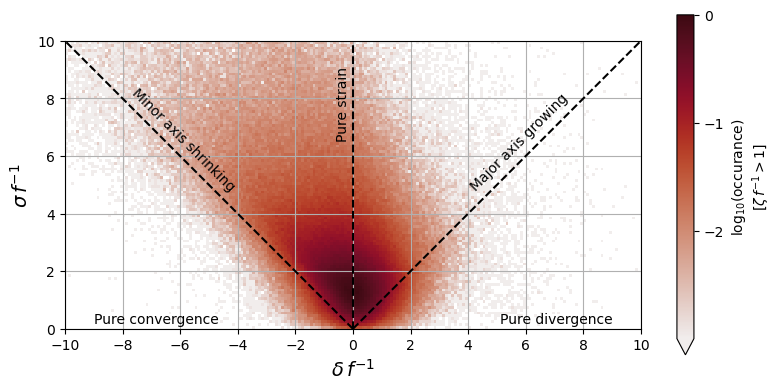

In [20]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0.1, 0.1, 0.9, 0.85])
pca = np.log10(h_dA).plot(ax=ax, cmap=cmo.amp, 
                          vmin=-3, vmax=0, 
                          cbar_kwargs={'label':'log$_{10}$(occurance)\n[$\\zeta\,f^{-1} > 1$]',
                                       'ticks': [-2, -1, 0]})

ax.set_aspect(1.0)
ax.plot([0, 10], [0, 10], '--k')
ax.plot([0, -10], [0, 10], '--k')
ax.plot([0, 0], [0, 10], '--k')
ax.set_xlabel(r'$\delta\,f^{-1}$', fontsize=14)
ax.set_ylabel(r'$\sigma\,f^{-1}$', fontsize=14)

ax.set_xticks(np.arange(-10, 12, 2))
ax.set_yticks(np.arange(0, 12, 2))
ax.grid(True)

ax.text(-9, 0.1, 'Pure convergence', horizontalalignment='left', verticalalignment='bottom')
ax.text(9, 0.1, 'Pure divergence', horizontalalignment='right', verticalalignment='bottom')
ax.text(4, 4.7, 'Major axis growing', horizontalalignment='left', verticalalignment='bottom', rotation=45)
ax.text(-4, 4.7, 'Minor axis shrinking', horizontalalignment='right', verticalalignment='bottom', rotation=-45)
ax.text(-0.6, 6.5, 'Pure strain', horizontalalignment='left', verticalalignment='bottom', rotation=90)

fig.savefig('delta_sigma_occurance.png', dpi=300)

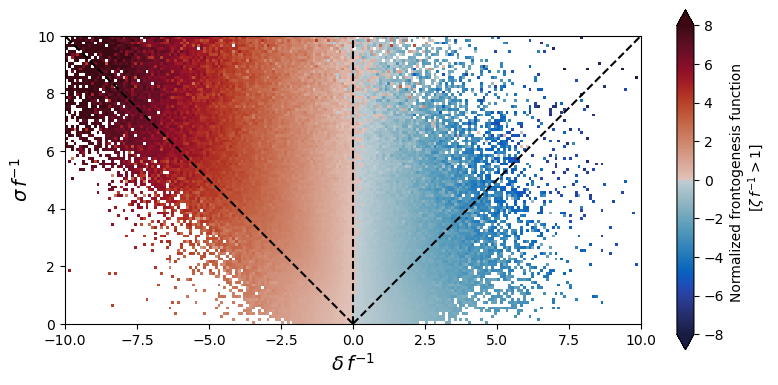

In [21]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0.1, 0.1, 0.9, 0.85])

pca = h_frontogenesis.plot(ax=ax, cmap=newcmp, 
                           vmin=-8, vmax=8,
                           cbar_kwargs={'label':'Normalized frontogenesis function \n [$\\zeta\,f^{-1} > 1$]',
                                        'ticks': np.arange(-10, 11, 2)})

ax.set_aspect(1.0)
ax.plot([0, 10], [0, 10], '--k')
ax.plot([0, -10], [0, 10], '--k')
ax.plot([0, 0], [0, 10], '--k')

ax.set_xlabel(r'$\delta\,f^{-1}$', fontsize=14)
ax.set_ylabel(r'$\sigma\,f^{-1}$', fontsize=14)
fig.savefig('Normalized_frontogenesis_function.png', dpi=300)

The plot of the normalized frontogenesis function cast into bins of divergence and strain indicate that divergence, not strain, is the overwhelmingly dominant factor in strengthening or weakening surface fronts. 

[-0.80247239  0.1708875 ]


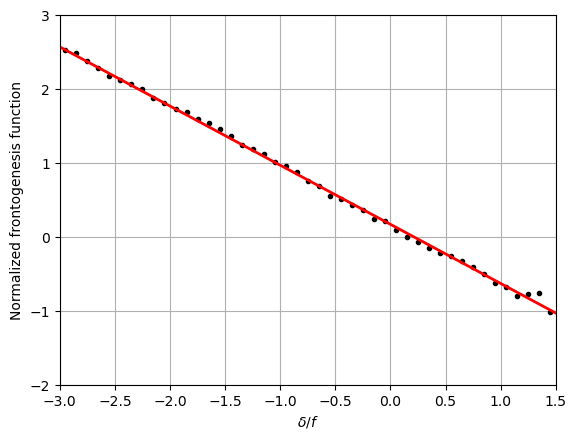

In [22]:
fgf_delta = np.nanmean(h_frontogenesis.values, axis=0)
delta_bins = h_frontogenesis['delta_bin'].values
igood = ~np.isnan(fgf_delta) & (delta_bins > -3) & (delta_bins < 1.45)
print(np.polyfit(delta_bins[igood], fgf_delta[igood], 1))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(delta_bins, fgf_delta, '.k')
ax.plot(delta_bins, -0.80*delta_bins + 0.17, '-r', lw=2)
ax.set_xlim(-3, 1.5)
ax.set_ylim(-2, 3)
ax.grid(True)
ax.set_xlabel(r'$\delta/f$')
ax.set_ylabel(r'Normalized frontogenesis function');

### CF-AF flows in different dynamical regimes

In [23]:
def set_conditional(zeta_min, zeta_max):
    return ( (ds.zeta.isel(ihslice).sel(tslice) > zeta_min) & 
             (ds.zeta.isel(ihslice).sel(tslice) < zeta_max) )

cbins = np.linspace(-5, 3, 201)
abins = np.linspace(-3, 3, 201)

def calc_histogram(conditional):
    h = histogram(ds.du_cf.sel(tslice).isel(ihslice).where(conditional),
                ds.du_af.sel(tslice).isel(ihslice).where(conditional), 
                bins=[cbins, abins]).compute()

    # create 2xtimexspace matrix
    X = np.asarray([ds.du_cf.sel(tslice).isel(ihslice).where(conditional).values,
                    ds.du_af.sel(tslice).isel(ihslice).where(conditional).values])

    # remove nans and flatten time and spacial dims
    idx = ~np.isnan(X[0])
    X = X[:, idx]

    e, v = np.linalg.eig(np.cov(X-X.mean(axis=1, keepdims=True)))

    # The distribution mean in x & y
    yo, xo = X.mean(axis=1)

    # The major/minor axis of variation, as a vector centered at 0,0
    v_major = [np.sqrt(e[0])*v[1, 0], np.sqrt(e[0])*v[0, 0]]
    v_minor = [np.sqrt(e[1])*v[1, 1], np.sqrt(e[1])*v[0, 1]]

    # The angle of the major axis, relative to the positive y-axis, positive CCW
    # In this case, pi/4 represents straining flow, 0 represents divergent flow
    theta = np.arctan(v[1, 0]/v[0, 0])
    
    mean_strain = ds.sigma.sel(tslice).isel(ihslice).where(conditional).mean().values
    mean_div = ds.delta.sel(tslice).isel(ihslice).where(conditional).mean().values
    
    return {'h': h, 
            'e': e, 
            'v': v, 
            'xo': xo,
            'yo': yo,
            'mean_strain': mean_strain,
            'mean_div': mean_div,
            'v_major': v_major, 
            'v_minor': v_minor, 
            'theta': theta}

zeta_brys = [-3., -1.5, -1., -0.5, 0., 0.5, 1., 1.5, 2., 3., 5.]
zeta_lims = zip(zeta_brys[:-1], zeta_brys[1:])

res = []
for zeta_min, zeta_max in zeta_lims:
    r = calc_histogram(set_conditional(zeta_min, zeta_max))
    r['zeta_min'] = zeta_min
    r['zeta_max'] = zeta_max
    res.append(r)
    
res = res + [res[-1],]

2024-04-25 16:50:36,062 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-04-25 16:50:36,081 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-04-25 16:50:36,714 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-04-25 16:50:37,322 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2024-04-25 16:50:38,087 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-04-25 16:50:38,300 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-04-25 16:50:38,716 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-04-25 16:50:39,415 - distributed.utils_perf - WARNING - full garbage collections took

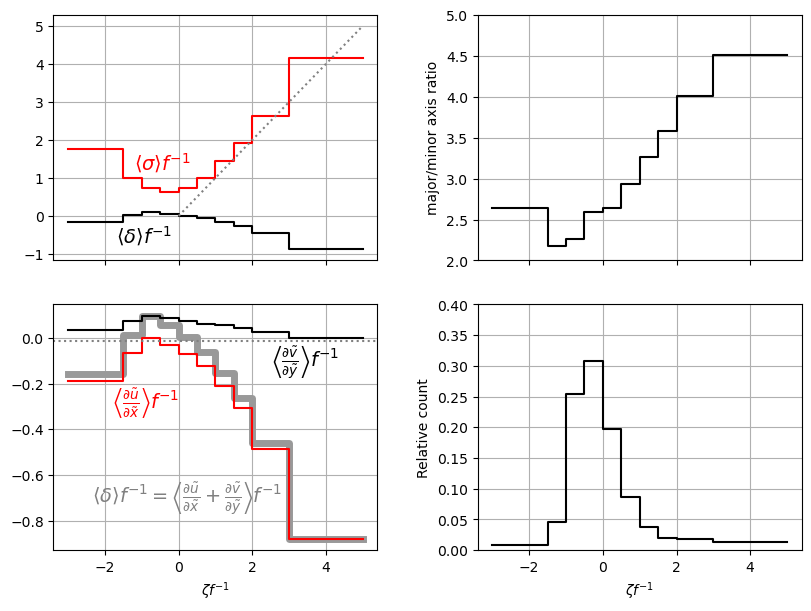

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), 
                        layout="constrained",
                        gridspec_kw={'wspace': 0.1, 'hspace': 0.1})

ax=axs[0,0]
ax.step(zeta_brys, [r['mean_div'] for r in res], 
        where='post', color='k')
ax.step(zeta_brys, [r['mean_strain'] for r in res], 
        where='post', color='r')
ax.plot([0, 5], [0, 5], ls=':', color='0.5')
ax.grid(True)
ax.set_xticklabels([])
ax.text(-1.2, 1.1, r'$\left< \sigma \right> f^{-1}$', color='r', 
        fontsize=14, verticalalignment='bottom')
ax.text(-1.7, -0.2, r'$\left< \delta \right> f^{-1}$', color='k', 
        fontsize=14, verticalalignment='top')

ax=axs[0,1]
ax.step(zeta_brys, [r['e'][0]/r['e'][1] for r in res], 
        where='post', color='k')
ax.set_ylim(2, 5)
ax.grid(True)
ax.set_xticklabels([])
ax.set_ylabel('major/minor axis ratio')

ax=axs[1,1]
hsum = np.sum([r['h'].sum() for r in res])
ax.step(zeta_brys, [r['h'].sum()/hsum for r in res], 
        where='post', color='k')
ax.set_ylim(0, 0.4)
ax.grid(True)
ax.set_xlabel(r'$\zeta f^{-1}$')
ax.set_ylabel(r'Relative count')

ax=axs[1, 0]
ax.step(zeta_brys, [r['xo']+r['yo'] for r in res], 
         where='post', color='0.6', lw=5)
ax.step(zeta_brys, [r['yo'] for r in res], where='post', color='r')
ax.step(zeta_brys, [r['xo'] for r in res], where='post', color='k')

ax.axhline(-0.012, ls=':', color='0.5')
ax.set_xlabel(r'$\zeta f^{-1}$')
ax.grid(True)
# ax.set_ylabel('Normalized velocity gradients')
ax.text(2.5, -0.02, r'$\left< \frac{\partial \tilde{v}}{\partial \tilde{y}} \right> f^{-1}$', 
        color='k', fontsize=14, verticalalignment='top')
ax.text(-1.8, -0.21, r'$\left< \frac{\partial \tilde{u}}{\partial \tilde{x}} \right> f^{-1}$', 
        color='r', fontsize=14, verticalalignment='top')
ax.text(2.8, -0.78, r'$\left< \delta \right> f^{-1} = \left< \frac{\partial \tilde{u}}{\partial \tilde{x}} + \frac{\partial \tilde{v}}{\partial \tilde{y}} \right> f^{-1}$', 
        color='0.5', fontsize=14, verticalalignment='bottom', horizontalalignment='right')

fig.savefig('zeta_bins_plots.pdf')

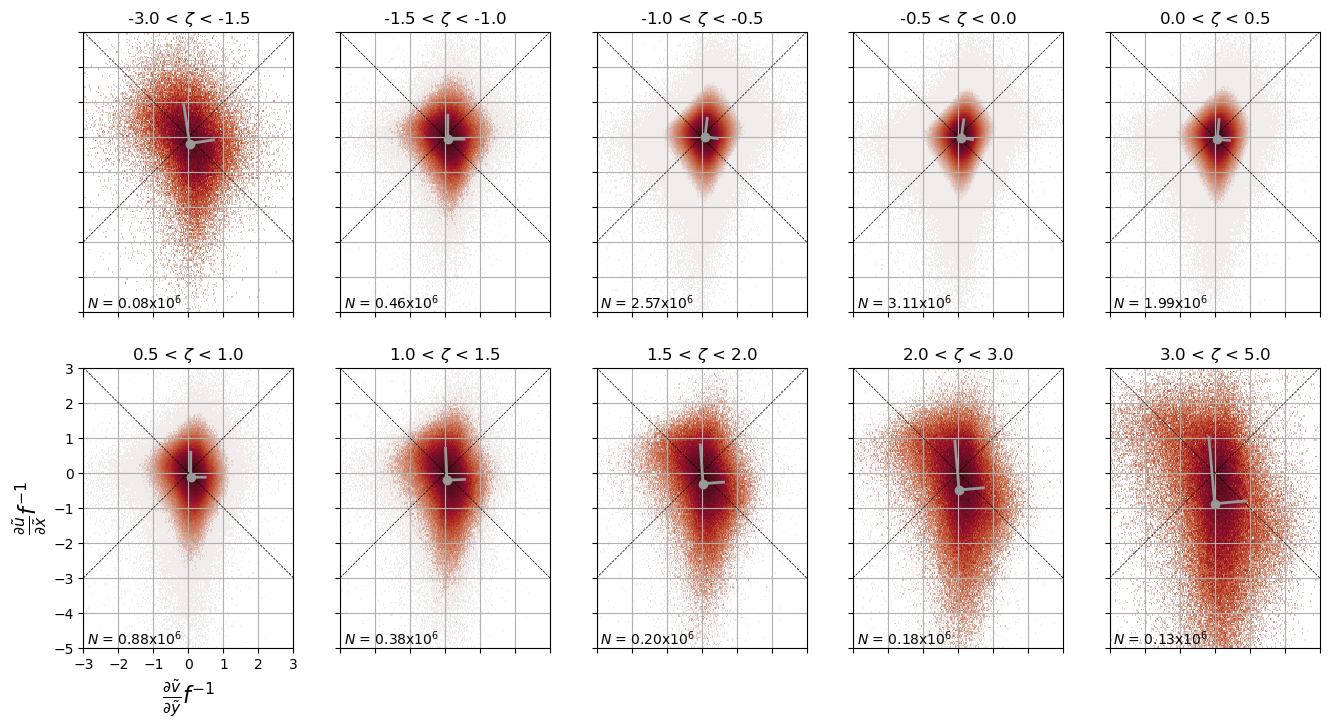

In [25]:
fig, axs = plt.subplots(2, 5, figsize=(16, 8))

for r, ax in zip(res[:-1], axs.flatten()):
    # fig = plt.figure(figsize=(6, 5))
    # ax = fig.add_subplot(111)
    pca = np.log10(r['h']/r['h'].max()).plot(ax=ax, cmap=cmo.amp, 
                            vmin=-2, vmax=0, add_colorbar=False)
    
    ax.plot([-3, 3], [-3, 3], '--k', lw=0.5)
    ax.plot([-3, 3], [3, -3], '--k', lw=0.5)

    ax.plot(r['xo'], r['yo'], 'o', color='0.6')
    ax.plot([r['xo'], r['xo']+np.sqrt(r['e'][0])*r['v'][1, 0]], [r['yo'], r['yo']+np.sqrt(r['e'][0])*r['v'][0, 0]], '-', color='0.6', lw=2)
    ax.plot([r['xo'], r['xo']+np.sqrt(r['e'][1])*r['v'][1, 1]], [r['yo'], r['yo']+np.sqrt(r['e'][1])*r['v'][0, 1]], '-', color='0.6', lw=2)

    ax.set_title(r'{} < $\zeta$ < {}'.format(r['zeta_min'], r['zeta_max']))
    
    ax.set_xlabel(r'$\frac{\partial \tilde{v}}{\partial \tilde{y}}f^{-1}$',
                  fontsize=16)
    ax.set_ylabel(r'$\frac{\partial \tilde{u}}{\partial \tilde{x}}f^{-1}$',
                  fontsize=16)
    ax.set_xticks(np.arange(-3, 4))
    ax.set_yticks(np.arange(-5, 4))
    
    if ax != axs[1, 0]:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xlabel('')
        ax.set_ylabel('')
    
    ax.text(-2.9, -4.9, r'$N$ = {:4.2f}x10$^6$'.format(r['h'].sum().values/1000000))
    ax.set_aspect(1.0)
    ax.grid(True)

fig.savefig('zeta_bins_hists.png', dpi=300)


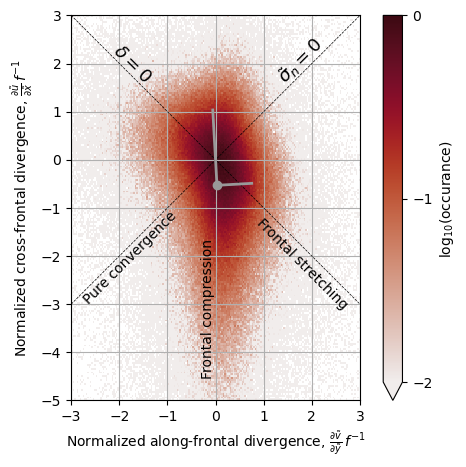

2024-04-25 17:37:09,853 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-04-26 00:31:26,940 - tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 1 memory: 31 MB fds: 34>>
Traceback (most recent call last):
  File "/Users/hetl729/miniconda3/envs/seahorce/lib/python3.11/site-packages/tornado/ioloop.py", line 919, in _run
    val = self.callback()
          ^^^^^^^^^^^^^^^
  File "/Users/hetl729/miniconda3/envs/seahorce/lib/python3.11/site-packages/distributed/system_monitor.py", line 160, in update
    net_ioc = psutil.net_io_counters()
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hetl729/miniconda3/envs/seahorce/lib/python3.11/site-packages/psutil/__init__.py", line 2119, in net_io_counters
    rawdict = _psplatform.net_io_counters()
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 12] Cannot allocate memory


In [26]:

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
pca = np.log10(h/h.max()).plot(ax=ax, cmap=cmo.amp, 
                           vmin=-2, vmax=0,
                           cbar_kwargs={'label':'log$_{10}$(occurance)',
                                        'ticks': [-2, -1, 0]})
ax.set_xlabel(r'Normalized along-frontal divergence, $\frac{\partial\tilde{v}}{\partial\tilde{y}}\,f^{-1}$')
ax.set_ylabel(r'Normalized cross-frontal divergence, $\frac{\partial\tilde{u}}{\partial\tilde{x}}\,f^{-1}$')

ax.plot([-3, 3], [-3, 3], '--k', lw=0.5)
ax.plot([-3, 3], [3, -3], '--k', lw=0.5)

ax.plot(xo, yo, 'o', color='0.6')
ax.plot([xo, xo+np.sqrt(e[0])*v[1, 0]], [yo, yo+np.sqrt(e[0])*v[0, 0]], '-', color='0.6', lw=2)
ax.plot([xo, xo+np.sqrt(e[1])*v[1, 1]], [yo, yo+np.sqrt(e[1])*v[0, 1]], '-', color='0.6', lw=2)

ax.text(-2.2, 1.6, r'$\delta=0$', rotation=-45, fontsize=13)
ax.text(1.2, 1.6, r'$\tilde{\sigma}_n=0$', rotation=45, fontsize=13)

ax.text(-2.8, -3, r'Pure convergence', rotation=45)
ax.text(-.3, -4.5, r'Frontal compression', rotation=90)
ax.text(.8, -3.1, r'Frontal stretching', rotation=-45)

ax.set_aspect(1.0)
ax.grid(True)

